In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.utils
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')

#dropping 'stab' column
df = df.drop('stab', axis = 1)

# splitting into features and target
X = df.drop('stabf', axis = 1)
y = df.stabf

#splititng into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [3]:
#df.head()

In [4]:
#Standardizing X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(X_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns=X_train.columns)

In [5]:
#standardizing X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_test_df = scaler.fit_transform(X_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns=X_test.columns)

In [6]:
#encode categorical variable 
#encoding y_train
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

#encoding y_test
y_test_encoded = encoder.fit_transform(y_test)

__Random Forest Classifier__

In [7]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(normalised_train_df, y_train)

RandomForestClassifier(random_state=1)

In [8]:
rfc_pred = rfc.predict(normalised_test_df)

In [9]:
score_formatted = "{:.4f}".format(accuracy_score(y_true=y_test, y_pred= rfc_pred))
print("Accuracy Score: ", score_formatted)

Accuracy Score:  0.9280


In [10]:
#model accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, rfc_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,rfc_pred, digits =4))

Accuracy: 93
Classification Report:
               precision    recall  f1-score   support

      stable     0.9176    0.8764    0.8966       712
    unstable     0.9333    0.9565    0.9448      1288

    accuracy                         0.9280      2000
   macro avg     0.9255    0.9165    0.9207      2000
weighted avg     0.9277    0.9280    0.9276      2000



__XGBoost Classifier__

In [11]:
xgboost = XGBClassifier(random_state = 1)

xgboost.fit(normalised_train_df, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [12]:
xgboost_pred = xgboost.predict(normalised_test_df)

score_formatted = "{:.4f}".format(accuracy_score(y_true=y_test_encoded, y_pred= xgboost_pred))
print("Accuracy Score: ", score_formatted)

Accuracy Score:  0.9460


__LGBM Classifier__

In [13]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=1)

In [14]:
lgbm.fit(normalised_train_df, y_train)

LGBMClassifier(random_state=1)

In [15]:
lgbm_pred = lgbm.predict(normalised_test_df)

In [16]:
score_formatted = "{:.4f}".format(accuracy_score(y_true=y_test, y_pred= lgbm_pred))
print("Accuracy Score: ", score_formatted)

Accuracy Score:  0.9365


__Extra trees classifier__

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
extratc = ExtraTreesClassifier(random_state =1)
extratc.fit(normalised_train_df, y_train)

ExtraTreesClassifier(random_state=1)

In [19]:
score_formatted = "{:.4f}".format(accuracy_score(y_true=y_test, y_pred= extratc.predict(normalised_test_df)))
print("Accuracy Score: ", score_formatted)

Accuracy Score:  0.9260


In [20]:
#Randomized search

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [21]:
from sklearn.model_selection import RandomizedSearchCV

extratc_random = RandomizedSearchCV(estimator = extratc, 
                                    param_distributions = hyperparameter_grid, 
                                    cv=5, 
                                    n_iter=10, 
                                    scoring = 'accuracy', 
                                    n_jobs = -1, 
                                    verbose = 1,
                                    random_state = 1)

In [22]:
search_extratc = extratc_random.fit(normalised_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [23]:
#best parameters
search_extratc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [24]:
#Evaluate ExtraTreesClassifier on test set using  best params
ETC = ExtraTreesClassifier(max_features = None, 
                            min_samples_leaf= 8,
                            min_samples_split= 2,
                            n_estimators= 1000, 
                            random_state = 1)

#fit on train set
ETC.fit(normalised_train_df, y_train)

#predict on test set
ETC_pred = ETC.predict(normalised_test_df)

In [25]:
score_formatted = "{:.4f}".format(accuracy_score(y_true=y_test, y_pred= ETC_pred))
print("Accuracy Score: ", score_formatted)

Accuracy Score:  0.9285


__Feature importance__

<AxesSubplot: >

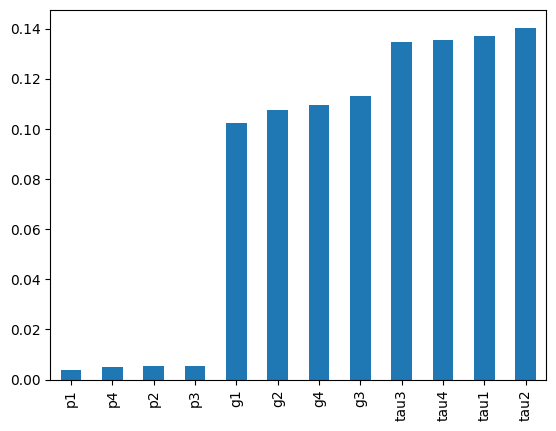

In [26]:
#Feature importance

feat_importance = pd.Series(ETC.feature_importances_, index = X.columns)
feat_importance.sort_values().plot(kind = 'bar')